In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 as cv
import os

In [18]:
img = image.load_img("dataset/train/stone/yes_0_14.jpeg")

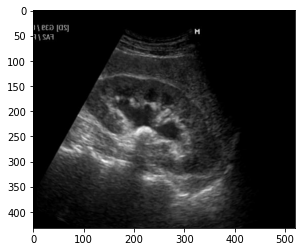

In [19]:
plt.imshow(img)

In [20]:
cv.imread("dataset/train/stone/yes_0_14.jpeg").shape

(432, 520, 3)

In [21]:
dir_path = 'dataset/train/stone'
dir_path1 = 'dataset1/train1/stone1'
for i in os.listdir(dir_path):
    img = cv.imread(dir_path+'//'+i)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    median = cv.medianBlur(gray, 5)
    cv.imwrite(dir_path1+'//'+i,median)

In [22]:
dir_path = 'dataset/train/without stone'
dir_path1 = 'dataset1/train1/without stone1'
for i in os.listdir(dir_path):
    img = cv.imread(dir_path+'//'+i)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    median = cv.medianBlur(gray, 5)
    cv.imwrite(dir_path1+'//'+i,median)

In [23]:
dir_path = 'dataset/validation/stone'
dir_path1 = 'dataset1/validation1/stone1'
for i in os.listdir(dir_path):
    img = cv.imread(dir_path+'//'+i)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    median = cv.medianBlur(gray, 5)
    cv.imwrite(dir_path1+'//'+i,median)

In [24]:
dir_path = 'dataset/validation/without stone'
dir_path1 = 'dataset1/train1/without stone1'
for i in os.listdir(dir_path):
    img = cv.imread(dir_path+'//'+i)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    median = cv.medianBlur(gray, 5)
    cv.imwrite(dir_path1+'//'+i,median)

In [25]:
train = ImageDataGenerator(rescale= 1/255)
validation  = ImageDataGenerator(rescale= 1/255)

In [26]:
train_dataset = train.flow_from_directory('dataset1/train1/',target_size=(200,200),
                                         class_mode = 'binary')
validation_dataset= validation.flow_from_directory('dataset1/validation1/',target_size=(200,200),
                                         class_mode = 'binary')

Found 1009 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [27]:
train_dataset.class_indices

{'stone1': 0, 'without stone1': 1}

In [28]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    
                                  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    
                                  tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    
                                   tf.keras.layers.Flatten(),
                                    
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')])

In [30]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [31]:
model_fit = model.fit(train_dataset,
                     epochs=5,
                     validation_data = validation_dataset)

Epoch 1/5
32/32 [==============================] - 23s 655ms/step - loss: 0.6978 - accuracy: 0.6819 - val_loss: 0.3990 - val_accuracy: 0.8194
Epoch 2/5
32/32 [==============================] - 15s 478ms/step - loss: 0.3639 - accuracy: 0.8642 - val_loss: 0.2571 - val_accuracy: 0.8472
Epoch 3/5
32/32 [==============================] - 15s 474ms/step - loss: 0.1469 - accuracy: 0.9495 - val_loss: 0.1933 - val_accuracy: 0.9028
Epoch 4/5
32/32 [==============================] - 15s 476ms/step - loss: 0.1258 - accuracy: 0.9633 - val_loss: 0.2733 - val_accuracy: 0.8750
Epoch 5/5
32/32 [==============================] - 15s 473ms/step - loss: 0.0462 - accuracy: 0.9841 - val_loss: 0.1068 - val_accuracy: 0.9444


In [ ]:
dir_path = 'dataset1/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x= image.img_to_array(img)
    x = np.expand_dims(x,axis =0)
    images =np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("kidney stone detected")
    else:
        print("kidney stone not detected")

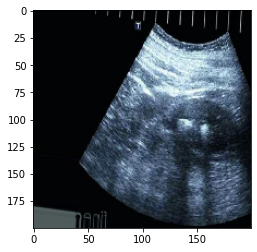

kidney stone detected


In [37]:
img = image.load_img("C:/Users/linso/Documents/Kidney stone detection/dataset1/test1/yes_0_1594.jpeg", target_size=(200,200))
plt.imshow(img)
plt.show()

    
x= image.img_to_array(img)
x = np.expand_dims(x,axis =0)
images =np.vstack([x])
val = model.predict(images)
if val == 0:
    print("kidney stone detected")
else:
    print("kidney stone not detected")